<a href="https://colab.research.google.com/github/Ridham-suhagiya/Machine-learning/blob/master/Frontal_eye_detection/code/model_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset from the google drive 
to get more information regarding the creation of data set check the read me.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
datogen =ImageDataGenerator(rescale = 1.0/255.0)    # data generator object creation
#Training data formed from the datogen object
train_it = datogen.flow_from_directory('/content/drive/MyDrive/eyes_train',target_size = (45,45),class_mode = 'categorical',batch_size = 64,color_mode = 'grayscale')
test_it = datogen.flow_from_directory('/content/drive/MyDrive/eyes_test' ,target_size = (45,45),class_mode = 'categorical',batch_size = 64,color_mode = 'grayscale')




Found 1931 images belonging to 1 classes.
Found 2001 images belonging to 1 classes.


In [4]:
train_it.class_indices

{'front': 0}

In [5]:
#importing all the deep learning libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [6]:
#Model 
def prepare_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape = (45,45,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.6))
  model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.6))
  model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.6))
  
  model.add(Dense(256,activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(2, activation = 'sigmoid'))
  model.add(Flatten())
  
  model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model
early_stop = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience = 5 ,
                               restore_best_weights=True)
mc = ModelCheckpoint('cnn_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [7]:
#Plot of the models performance 
import matplotlib.pyplot as plt
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig, ax = plt.subplots(1,2,figsize=(20,10))
  ax[0].plot(epochRange,history.history['accuracy'],'b',label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],'r',label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize = 20)
  ax[0].set_ylabel('Accuracy', fontsize = 20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')
  ax[1].plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize = 20)
  ax[1].set_ylabel('Loss', fontsize = 20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
  plt.show()


In [8]:
model = prepare_model()
training = model.fit(train_it,validation_data = test_it,epochs = 12 ,verbose = 2 ,batch_size = 64,callbacks = [early_stop,mc])

epoches = len(training.history['loss'])
print('train_accuracy: ',model.evaluate(train_it)) 

Epoch 1/12

Epoch 00001: val_loss improved from inf to 1.38639, saving model to cnn_model.h5
31/31 - 488s - loss: 1.4599 - accuracy: 0.9581 - val_loss: 1.3864 - val_accuracy: 1.0000 - 488s/epoch - 16s/step
Epoch 2/12

Epoch 00002: val_loss improved from 1.38639 to 1.38636, saving model to cnn_model.h5
31/31 - 13s - loss: 1.3863 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 1.0000 - 13s/epoch - 425ms/step
Epoch 3/12

Epoch 00003: val_loss improved from 1.38636 to 1.38635, saving model to cnn_model.h5
31/31 - 13s - loss: 1.3863 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 1.0000 - 13s/epoch - 421ms/step
Epoch 4/12

Epoch 00004: val_loss did not improve from 1.38635
31/31 - 13s - loss: 1.3863 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 1.0000 - 13s/epoch - 413ms/step
Epoch 5/12

Epoch 00005: val_loss did not improve from 1.38635
31/31 - 13s - loss: 1.3863 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 1.0000 - 13s/epoch - 416ms/step
Epoch 6/12

Epoch 0000

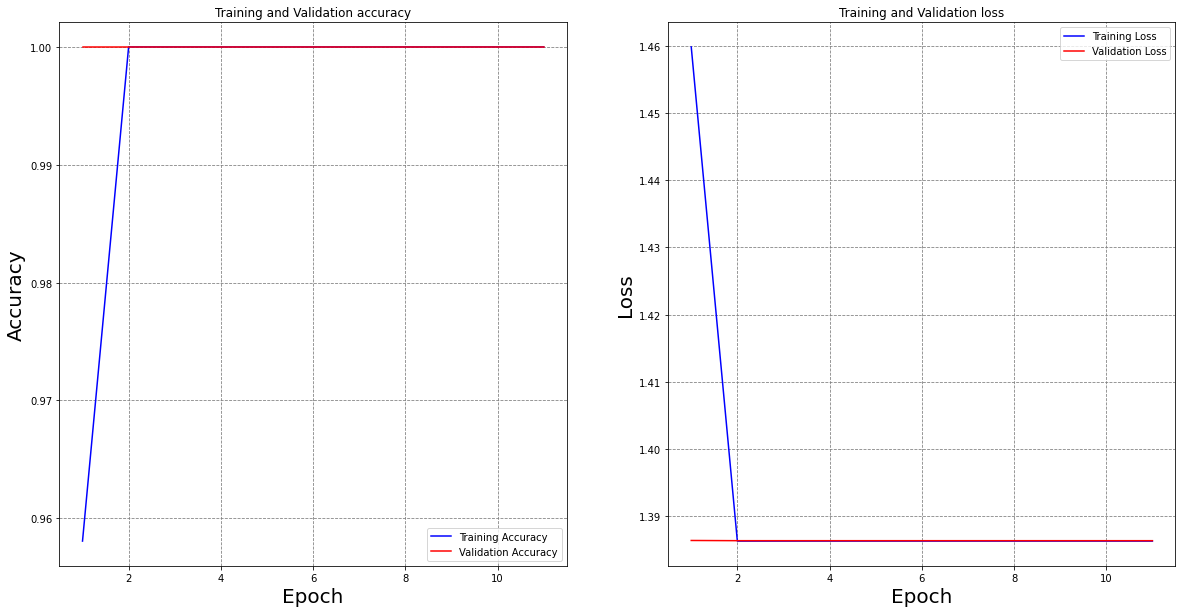

In [9]:
plotLearningCurve(training,epoches)

Saving the model

In [10]:

import pickle 
file = open('/content/model.pkl','wb')
pickle.dump(model,file)
file.close()


INFO:tensorflow:Assets written to: ram://c87e560b-c02c-4b49-a92c-b1a572d9be8e/assets
